<a href="https://colab.research.google.com/github/jfaraudo/Schrodinger_Numerical/blob/main/HarmonicOscillator/Quantum_Harmonic_Oscillator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Particle in a 1D Harmonic Oscillator**

The code assumed the particle is an electron and we use Atomic Units.

We start importing libraries:

In [97]:
import numpy as np
import matplotlib.pyplot as plt

We use the same parameters (force constant k=1) as in this Chemistry LibreText example https://chem.libretexts.org/Bookshelves/Physical_and_Theoretical_Chemistry_Textbook_Maps/Quantum_Tutorials_(Rioux)/09%3A_Numerical_Solutions_for_Schrodinger's_Equation/9.09%3A_Numerical_Solutions_for_the_Harmonic_Oscillator

In [98]:
#Potential as a function of position
def getV(x):
    epsilon = 100
    sigma = 1
    potvalue = 4*epsilon*((sigma/x)**12 - (sigma/x)**6)
    return potvalue

And now we define a function that calculates the matrix (denoted by F in the theoretical derivation) that encodes the Schrödinger Equation in finite diference form for n points from 0 to n-1

In [99]:
#Discretized Schrodinger equation in n points (FROM 0 to n-1)
def Eq(n,h,x):
    F = np.zeros([n,n])
    for i in range(0,n):
        F[i,i] = -2*((h**2)*getV(x[i]) + 1)
        if i > 0:
           F[i,i-1] = 1
           if i < n-1:
              F[i,i+1] = 1
    return F

Up to now, the code does nothing explicitly. We have just defined how to calculate the potential and how to calculate the matrix F

Let us now start the numerical solution, entering the parameters that we need: the discretization h and the size of the box. You can play with these values to see the effect they have in the numerical method.

In [100]:
# Interval for calculating the wave function [-L/2,L/2]
xlower = 0.75
xupper = 3.5

#Discretization options
h = 0.01  #discretization in space

#Create coordinates at which the solution will be calculated
x = np.arange(xlower,xupper+h,h)
#grid size (how many discrete points to use in the range [-L/2,L/2])
npoints=len(x)

print("Using",npoints, "grid points.")

Using 276 grid points.


Now we can calculate F explicitly and diagonalize. The result of the diagonalization is **not ordered** so we have to order the results (energies and wavefunctions) by energy values.

In [101]:
#Calculation of discrete form of Schrodinger Equation and diagonalization
F=Eq(npoints,h,x)
eigenValues, eigenVectors = np.linalg.eig(F)

#Order results by eigenvalue
# w ordered eigenvalues and vs ordered eigenvectors
idx = eigenValues.argsort()[::-1]
w = eigenValues[idx]
vs = eigenVectors[:,idx]

#Energy Level
E = - w/(2.0*h**2)

Print **Energy Results** for the first energy levels:

In [102]:
#Energy Levels
E = - w/(2.0*h**2)
for k in range(0,8):
  print("n=",k,", E(numeric)=%.4f" %E[k])

n= 0 , E(numeric)=-66.2825
n= 1 , E(numeric)=-23.0033
n= 2 , E(numeric)=-4.1442
n= 3 , E(numeric)=1.0947
n= 4 , E(numeric)=5.9390
n= 5 , E(numeric)=12.9477
n= 6 , E(numeric)=21.8231
n= 7 , E(numeric)=32.4248


Now let us show the Wavefunctions obtained in the diagonalization process

Plotting


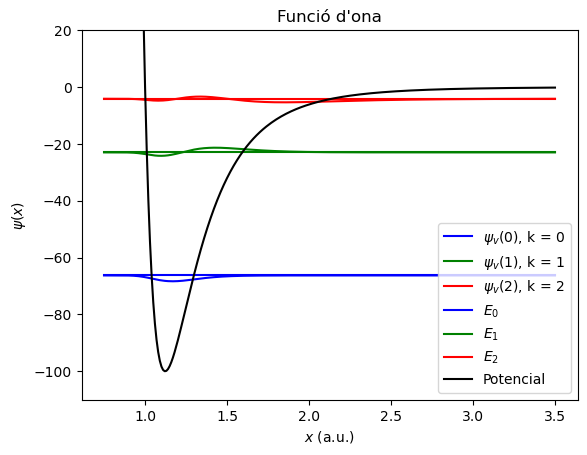

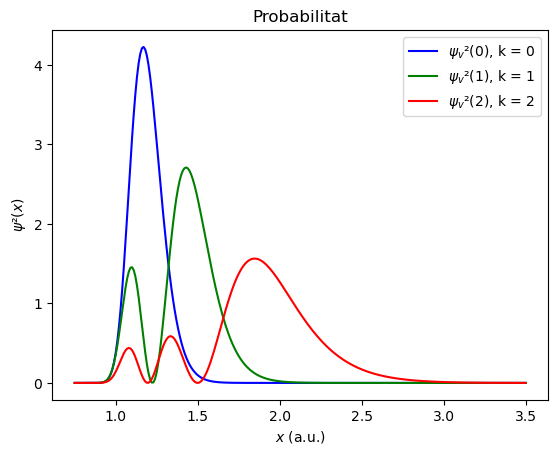

In [103]:
#Init Wavefunction (empty list with npoints elements)
psi = [None]*npoints

#Calculation of normalised Wave Functions
for k in range(0,len(w)):
	psi[k] = vs[:,k]
	integral = h*np.dot(psi[k],psi[k])
	psi[k] = psi[k]/integral**0.5

#Plot Wave functions
print("Plotting")

plt.plot(x,psi[0]+E[0],color='blue',label=r'$\psi_v(0)$, k = ' + str(0))
plt.plot(x,psi[1]+E[1],color='green',label=r'$\psi_v(1)$, k = ' + str(1))
plt.plot(x,psi[2]+E[2],color='red',label=r'$\psi_v(2)$, k = ' + str(2))
plt.plot(x,E[0]*(x/x),color='blue',label=r"$E_0$")
plt.plot(x,E[1]*(x/x),color='green',label=r"$E_1$") 
plt.plot(x,E[2]*(x/x),color='red',label=r"$E_2$")
plt.plot(x,getV(x),color='black',label='Potencial')
plt.legend()
plt.title("Funció d'ona")
plt.xlabel(r'$x$ (a.u.)')
plt.ylabel(r'$\psi(x)$')
plt.ylim(-110,20)
plt.show()

plt.plot(x,((psi[0])**2),color='blue',label=r'$\psi_v²(0)$, k = ' + str(0))
plt.plot(x,((psi[1])**2),color='green',label=r'$\psi_v²(1)$, k = ' + str(1))
plt.plot(x,((psi[2])**2),color='red',label=r'$\psi_v²(2)$, k = ' + str(2))
plt.legend()
plt.title("Probabilitat")
plt.xlabel(r'$x$ (a.u.)')
plt.ylabel(r'$\psi²(x)$')
plt.show()
